In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
spark = SparkSession.builder.appName("Customer_Count").getOrCreate()

In [3]:
query= "(SELECT cust_state, COUNT(*) AS \
            'Customers_count' FROM cdw_sapp_customer \
             GROUP BY cust_state ORDER BY COUNT(*) desc LIMIT 5) as cust_count"

sdf_count = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_count.show()

+----------+---------------+
|cust_state|Customers_count|
+----------+---------------+
|        NY|             96|
|        GA|             73|
|        PA|             72|
|        FL|             64|
|        IL|             58|
+----------+---------------+



In [4]:
#strans_rate.show()
pd_count = sdf_count.toPandas()
pd_count.set_index('cust_state', inplace = True)

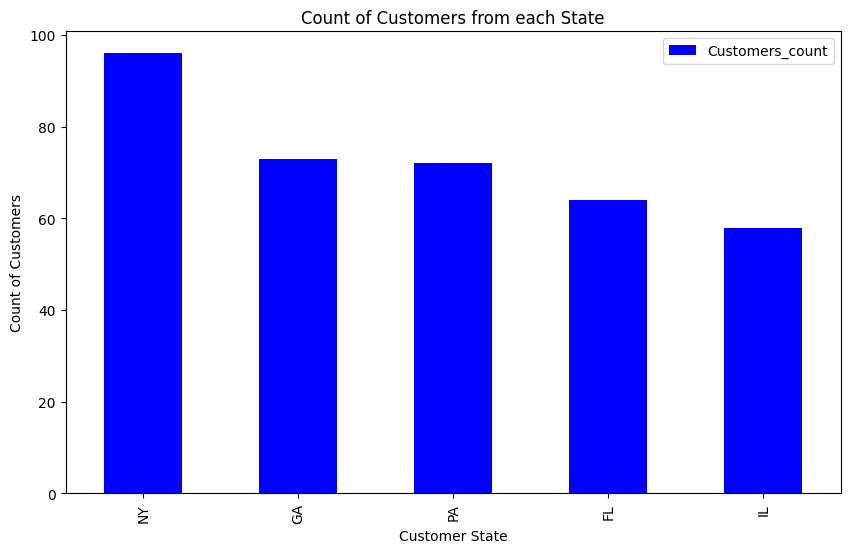

In [5]:
pd_count.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.xlabel('Customer State')
plt.ylabel('Count of Customers')
plt.title('Count of Customers from each State')
plt.show()

In [6]:
spark.stop()